## Determinación de $f_p$ para los filtros


In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from sympy import integrate, sin, pi, Abs, factor, N
from sympy.abc import t,a,n, k
import math 
import cmath

In [29]:
fun = a*sin(t)
P = 1/(3*pi) * integrate(fun**2,(t,0,3*pi))
a_0 = 4*a/(3*pi)
a_n = 12*a/((9-4*n**2)*pi)
P_k_1 = []
freq_k_1 = []
for k in range(1,20):
    freq_k_1.append(N(k*1/(2*pi),5))
    P_k_1.append(N((a_0**2)/4, 5))
    for _n in range(1,k+1):
        P_k_1[k-1] += N(((a_n.subs(n,_n))**2)/2,5)
    P_k_1[k-1] = N(factor(P_k_1[k-1]/P*100), 5)


In [30]:
fun = a*math.e**-t
P = 1/5 * integrate(fun**2,(t, 0, 5))
a_0 = 2*a/5*(1-math.e**(-5))
a_n = 2*a/5*(1-math.e**(-5)*(-1)**n)/(1+(math.pi*n/5)**2)
P_k_2 = []
freq_k_2 = []
for k in range(1,30):
    freq_k_2.append(N(k*1/10,5))
    P_k_2.append(N((a_0**2)/4, 5))
    for _n in range(1,k+1):
        P_k_2[k-1] += N(((a_n.subs(n,_n))**2)/2,5)
    P_k_2[k-1] = N(factor(P_k_2[k-1]/P*100), 5)


C:\Users\santi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


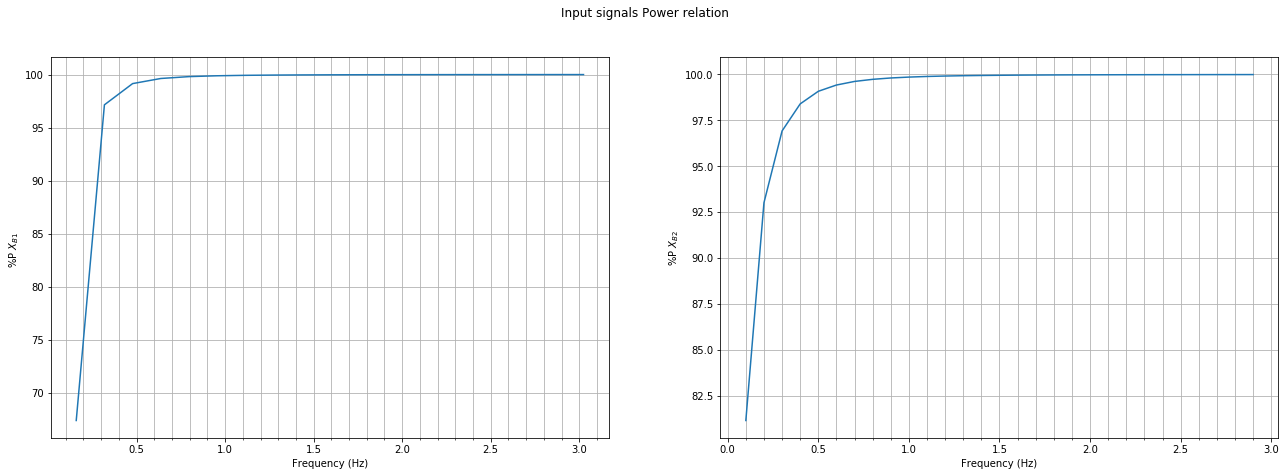

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))
fig.suptitle('Input signals Power relation')

ax1.plot(freq_k_1, P_k_1)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('%P $X_{B1}$  ')

ax2.plot(freq_k_2, P_k_2)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('%P $ X_{B2} $')

fig.show()
fig.savefig('potencia_lowf.png')